In [84]:
import cv2
import matplotlib.pyplot as plt
import imutils
import numpy as np

In [85]:
image=cv2.imread("plant.jpeg")

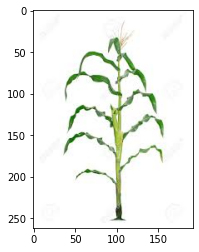

In [65]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
#cv2.waitKey(0)

## Basic Shape Properties
### Bounding Box

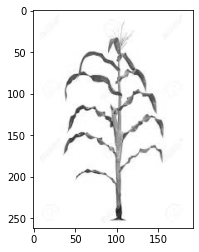

In [66]:
#### Convert the image into grayscale image
gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')
plt.show()

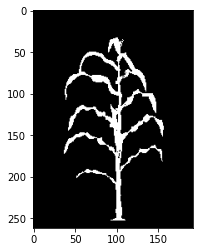

In [67]:
### Convert image into binary scale image using inv_threshold
T,inv_thresh=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU )
cv2.imwrite("binary.jpg",inv_thresh)
plt.imshow(inv_thresh,cmap='gray')
plt.show()

## Finding and drawing bouding box using conoturs

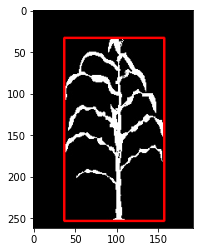

In [68]:
contours=cv2.findContours(inv_thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
grab_cnts=imutils.grab_contours(contours)
img=cv2.imread("binary.jpg")
clone=img.copy()
for c in grab_cnts:
    (x,y,w,h)=cv2.boundingRect(c)
    cv2.rectangle(clone,(x,y),(x+w,y+h),(0,0,255),2)
    #cv2.putText(clone,"Bounding box",(x-1,y-3),1,cv2.FONT_HERSHEY_PLAIN,(255,0,0),1)
cv2.imwrite("bounding_box.jpg",clone)
plt.imshow(cv2.cvtColor(clone,cv2.COLOR_BGR2RGB))
plt.show()

## Convex Hull

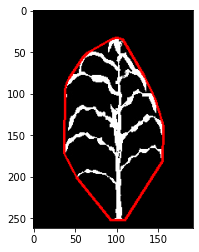

In [69]:
for c in grab_cnts:
    area=cv2.contourArea(c)
    box=cv2.boundingRect(c)
    hull=cv2.convexHull(c)
    hull_area=cv2.contourArea(hull)
    solidity=area/float(hull_area)
    clone=img.copy()
    cv2.drawContours(clone,[hull],-1,(0,0,255),2)
cv2.imwrite("Convex_hull.jpg",clone)
plt.imshow(cv2.cvtColor(clone,cv2.COLOR_BGR2RGB))
plt.show()

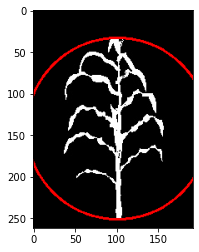

In [70]:
clone=img.copy()
for c in grab_cnts:
    (x,y),radius=cv2.minEnclosingCircle(c)
    cv2.circle(clone,(int(x),int(y)),int(radius),(0,0,255),2)
plt.imshow(cv2.cvtColor(clone,cv2.COLOR_BGR2RGB))
plt.show()

### Basic Shapes
* AR(Aspect Ratio)=Plant_height/Plant_Height

In [77]:
w,h=box[2:] ## Hieght and width of the plant
AR=h/w
print("Aspect Ratio of Plant is:{}".format(AR))

Aspect Ratio of Plant is:1.8333333333333333


### Circularity
* C=4*pi*(Area/Preimeter**2)

In [82]:
Perimeter=2*(h+w)
Area=h*w
C= 4*3.14*(Area/Perimeter**2)
print(f"Circularity of Plant is {C}")

Circularity of Plant is 0.7170934256055363


## COLOR Property
### Average Greenness in image

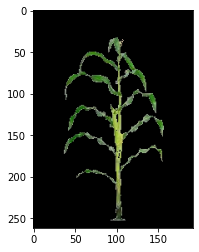

In [97]:
## To find average green in plant we will first mask our image
#mask = np.zeros(image.shape[:2], dtype="uint8")
#cv2.rectangle(mask,box,255,-1)
masked = cv2.bitwise_and(image, image, mask=inv_thresh)
plt.imshow(cv2.cvtColor(masked,cv2.COLOR_BGR2RGB))
plt.show()